In [10]:
# Author : Saswat Swain
# Email : Saswatswain20@gmail.com
# Designation : Project Engineer,Wipro Limited
# This is a clustering problem for Retail Data 

# Hierarchial Clustering

## Import Libraries & DataSets

In [2]:
import matplotlib.pyplot as plt  
import pandas as pd  
%matplotlib inline
import numpy as np  

In [3]:
customer_data = pd.read_csv('/home/Saswat/ML_Python/shopping_data.csv')  

In [4]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
customer_data.shape

(200, 5)

In [6]:
data = customer_data.iloc[:, 3:5].values  

## Run Dendogram based hierarchial clustering

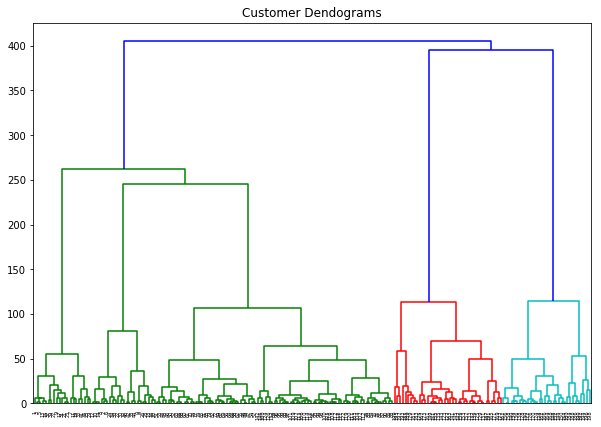

In [7]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward'))  

## Predict the clusters for the observations 

In [8]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data)  

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

## Plot the clusters

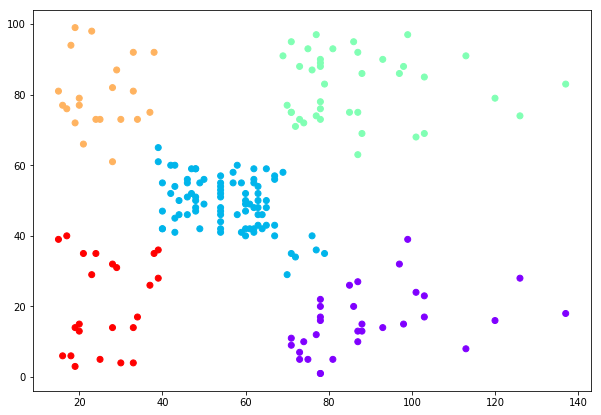

In [9]:
plt.figure(figsize=(10, 7))  
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')  

# K-Means Clustering

## Import Libraries and Dataset

In [45]:
#importing the dataset
dataset = pd.read_csv('/home/utkarsh/LearnBay/ML_Python/Cust_Spend_Data.csv')
#creating a duplicate dataset to work on
dataset1 = dataset
# peeking at the dataset
dataset1.head()

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3


In [46]:
#Descriptive stats of the variables in data
dataset1.describe()

,Cust_ID,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
count,10.00000,10.000000,10.000000,10.000000,10.0000,10.00000
mean,5.50000,4850.000000,4.000000,0.300000,4.3000,4.00000
std,3.02765,2877.595447,1.699673,0.483046,4.6916,3.05505
min,1.00000,1000.000000,2.000000,0.000000,1.0000,0.00000
25%,3.25000,2500.000000,3.000000,0.000000,1.0000,2.00000
50%,5.50000,5000.000000,3.500000,0.000000,1.5000,3.50000
75%,7.75000,6875.000000,5.000000,0.750000,8.2500,6.25000
max,10.00000,10000.000000,7.000000,1.000000,12.0000,9.00000


## Feature Scaling

In [47]:
data = dataset1.iloc[:, 2:6].values  #standardize the data to normal distribution
from sklearn import preprocessing
dataset1_standardized = preprocessing.scale(data)
dataset1_standardized = pd.DataFrame(dataset1_standardized)

/home/utkarsh/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


## WSS Plot or Elbow Curve for Optimal cluster identification

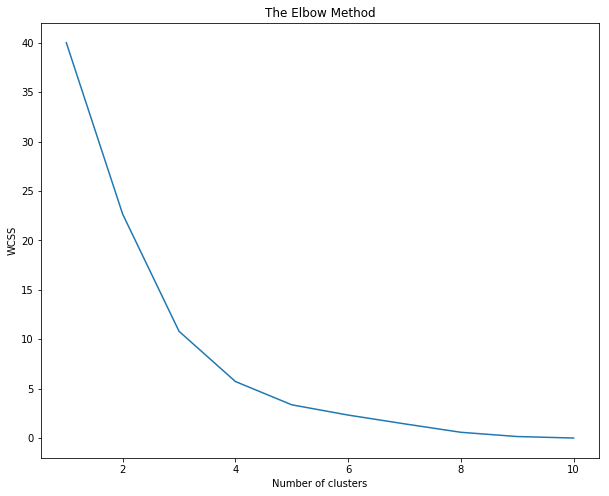

In [48]:
# find the appropriate cluster number
plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset1_standardized)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## K-Means Clustering & Cluster Information

In [49]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(dataset1_standardized)
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1
# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)
# Adding cluster to the Dataset1
dataset1['cluster'] = cluster
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(dataset1.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Cust_ID,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
cluster,,,,,,
1,4.7,5166.7,4.7,0.0,11.0,4.7
2,8.2,2375.0,3.0,0.0,1.2,4.5
3,2.7,7833.3,4.7,1.0,1.7,2.7
